<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Importing Libraries</b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import networkx as nx
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b>The Dataset and EDA</b>
</div>

In [2]:
df=pd.read_csv(r"/content/UCI_Credit_Card.csv")
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
x=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

# split Data

In [6]:
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=.2, random_state=42)
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

In [7]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
21753,80000.0,2,2,2,24,0,0,0,0,0,...,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0
251,30000.0,1,2,2,28,0,0,0,0,0,...,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0
22941,180000.0,2,5,1,44,0,0,-1,-1,-1,...,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0
618,60000.0,1,1,2,25,0,0,0,0,0,...,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0
17090,130000.0,2,2,2,25,0,0,0,0,0,...,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 21753 to 23654
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   24000 non-null  float64
 1   SEX                         24000 non-null  int64  
 2   EDUCATION                   24000 non-null  int64  
 3   MARRIAGE                    24000 non-null  int64  
 4   AGE                         24000 non-null  int64  
 5   PAY_0                       24000 non-null  int64  
 6   PAY_2                       24000 non-null  int64  
 7   PAY_3                       24000 non-null  int64  
 8   PAY_4                       24000 non-null  int64  
 9   PAY_5                       24000 non-null  int64  
 10  PAY_6                       24000 non-null  int64  
 11  BILL_AMT1                   24000 non-null  float64
 12  BILL_AMT2                   24000 non-null  float64
 13  BILL_AMT3                   2400

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 2308 to 29171
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   6000 non-null   float64
 1   SEX                         6000 non-null   int64  
 2   EDUCATION                   6000 non-null   int64  
 3   MARRIAGE                    6000 non-null   int64  
 4   AGE                         6000 non-null   int64  
 5   PAY_0                       6000 non-null   int64  
 6   PAY_2                       6000 non-null   int64  
 7   PAY_3                       6000 non-null   int64  
 8   PAY_4                       6000 non-null   int64  
 9   PAY_5                       6000 non-null   int64  
 10  PAY_6                       6000 non-null   int64  
 11  BILL_AMT1                   6000 non-null   float64
 12  BILL_AMT2                   6000 non-null   float64
 13  BILL_AMT3                   6000 n

In [10]:
train_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,...,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125,0.221792
std,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,...,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219,0.415460
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [11]:
test_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168515.000000,1.599000,1.849667,1.553667,35.450000,-0.016833,-0.143333,-0.158333,-0.221667,-0.270333,...,44260.616167,40955.672833,39304.640167,5634.596333,5761.414167,5095.421500,4606.995833,4721.541167,5439.664333,0.218833
std,129804.158748,0.490142,0.783051,0.518811,9.149232,1.113144,1.195280,1.217447,1.173354,1.134226,...,65371.581858,61438.887878,60633.455058,14291.261596,17191.910749,14794.321136,12796.017970,13830.882694,18999.354760,0.413490
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2314.250000,1764.250000,1159.750000,1000.000000,750.000000,399.250000,316.000000,279.000000,132.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19185.000000,18163.500000,16823.000000,2200.000000,2021.500000,1893.500000,1567.000000,1504.000000,1502.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56358.250000,50754.000000,49584.750000,5017.250000,5000.000000,4575.750000,4200.000000,4100.000000,4200.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,706864.000000,489200.000000,527566.000000,302000.000000,384986.000000,344261.000000,330982.000000,303512.000000,528666.000000,1.000000


In [12]:
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [13]:
df.duplicated().sum()

np.int64(35)

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid rgb(68, 247, 125);
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Plots before handling outliers</b>
</div>

# Countplot for categorical variables

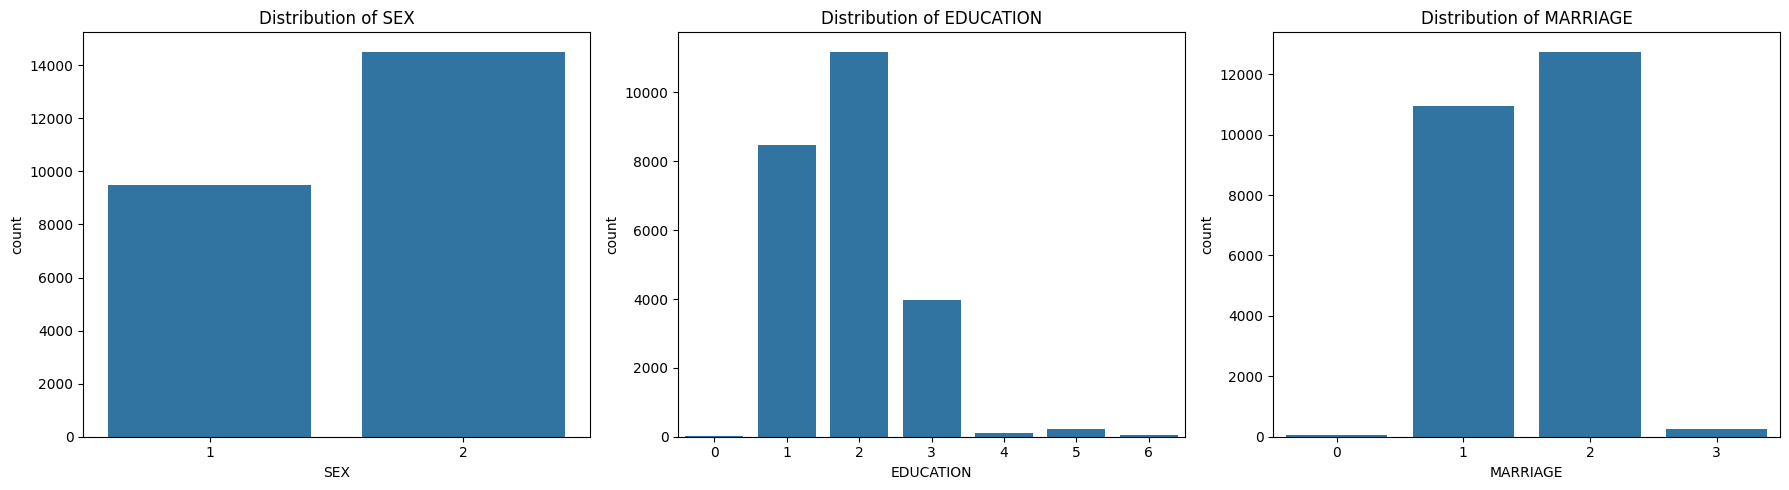

In [14]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

plt.figure(figsize=(18, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=column, data=train_df)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

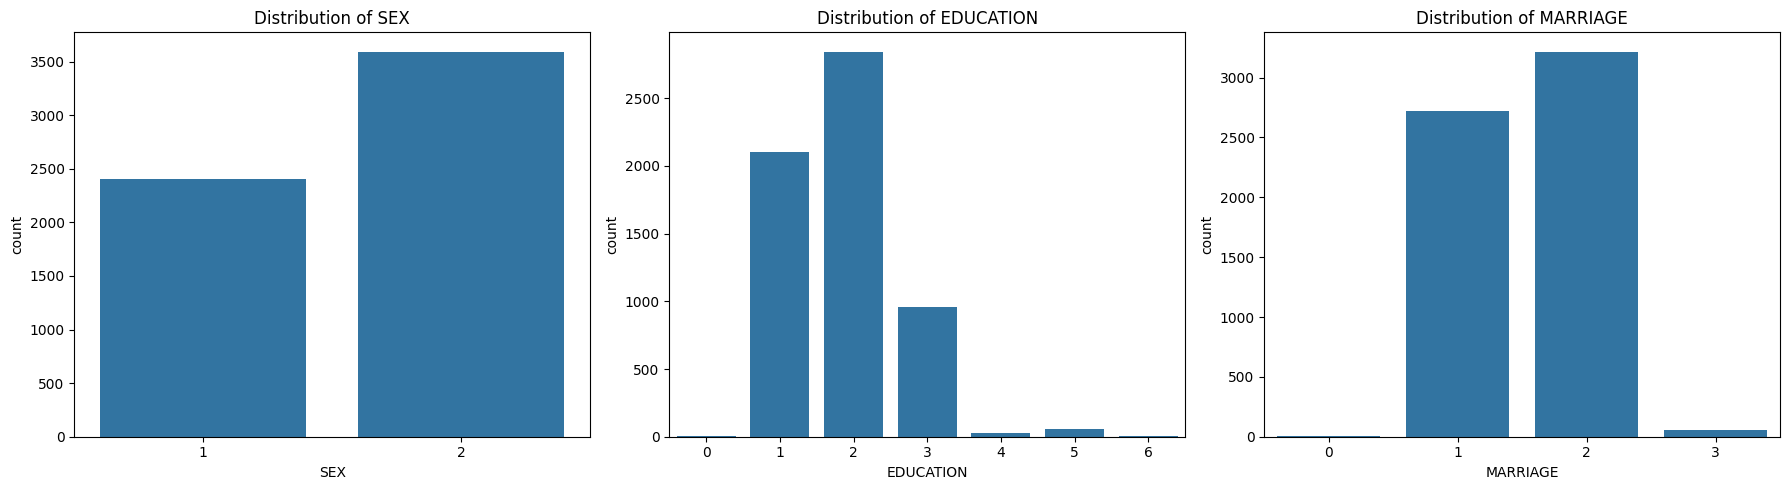

In [15]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

plt.figure(figsize=(18, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=column, data=test_df)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

# Histogram for numerical variables

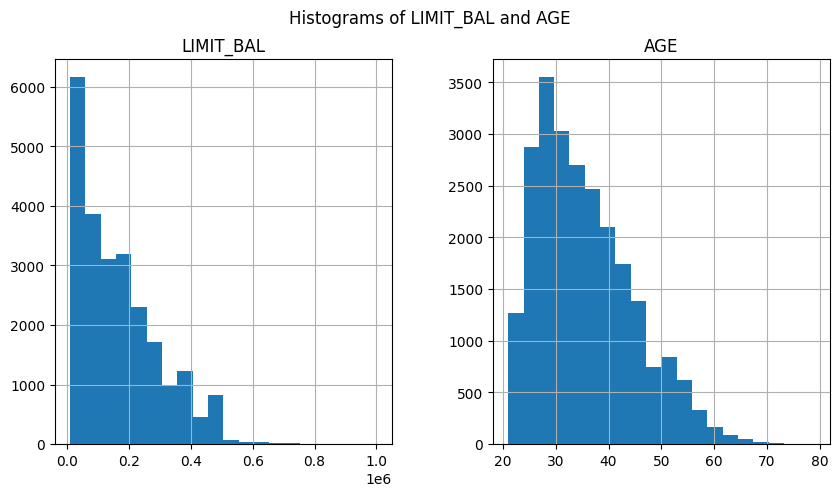

In [16]:
train_df[['LIMIT_BAL', 'AGE']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Histograms of LIMIT_BAL and AGE")
plt.show()

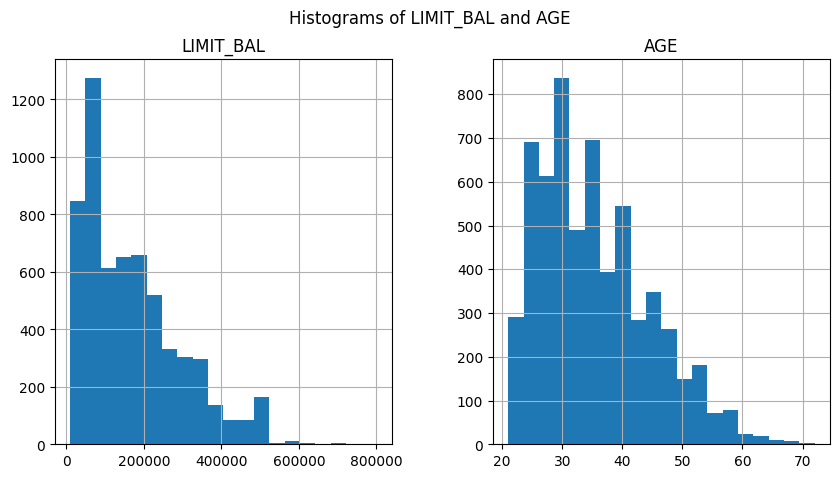

In [17]:
test_df[['LIMIT_BAL', 'AGE']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Histograms of LIMIT_BAL and AGE")
plt.show()

## # Boxplot for numerical variables to check for outliers

Train

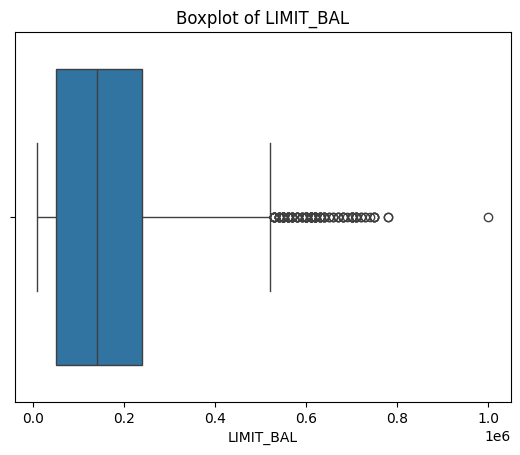

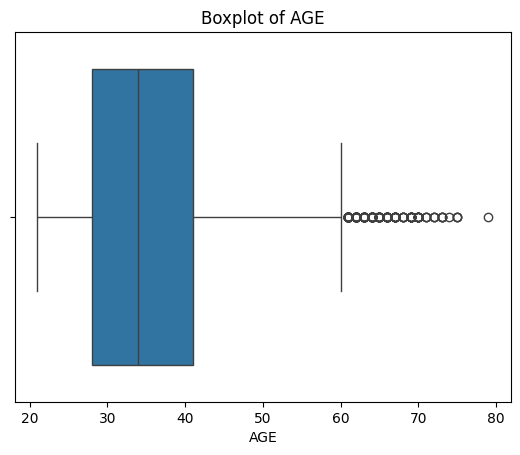

In [18]:
sns.boxplot(x=train_df['LIMIT_BAL'])
plt.title("Boxplot of LIMIT_BAL")
plt.show()

sns.boxplot(x=df['AGE'])
plt.title("Boxplot of AGE")
plt.show()

test

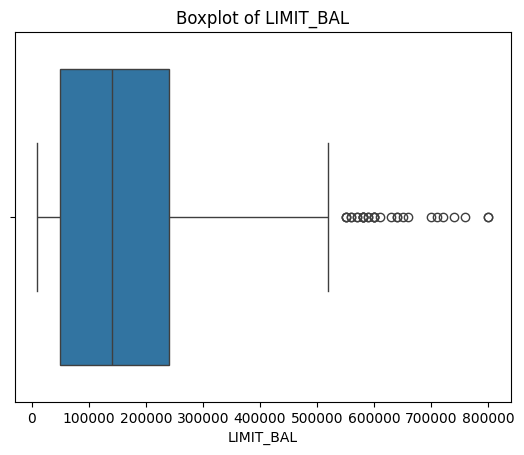

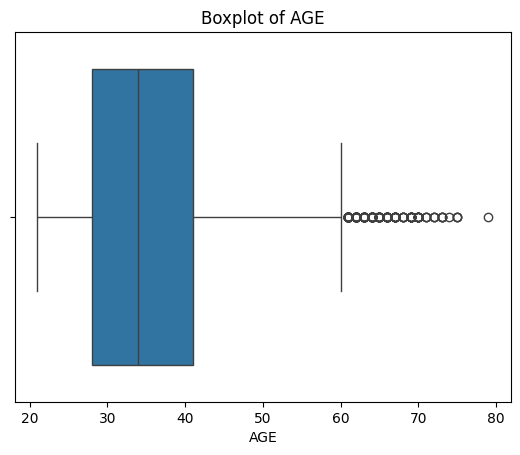

In [19]:
# Boxplot for numerical variables to check for outliers
sns.boxplot(x=test_df['LIMIT_BAL'])
plt.title("Boxplot of LIMIT_BAL")
plt.show()

sns.boxplot(x=df['AGE'])
plt.title("Boxplot of AGE")
plt.show()

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #FF9B50;
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Handling outliers using IQR</b>
</div>


# #train

In [20]:
def detect_outliers(df):
    df_numeric = df.select_dtypes(include='number')

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

X = train_df.drop('default.payment.next.month', axis=1)
y = train_df['default.payment.next.month']

outliers = detect_outliers(X)

df_no_outliers = train_df[~outliers.any(axis=1)]

print("Data shape before removing outliers:", train_df.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)

train_df = df_no_outliers

Data shape before removing outliers: (24000, 24)
Data shape after removing outliers: (10410, 24)


# #test

In [21]:
def detect_outliers(df):
    df_numeric = df.select_dtypes(include='number')

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

# Assuming test_df has the same columns as train_df (except the target variable)
X = train_df.drop('default.payment.next.month', axis=1)
y = train_df['default.payment.next.month']

# Detect outliers based on the training data
outliers = detect_outliers(X)

# Reindex outliers to match test_df
outliers = outliers.reindex(test_df.index)

# Remove outliers from test_df
df_no_outliers = test_df[~outliers.any(axis=1)]

print("Data shape before removing outliers:", test_df.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)

# Update test_df with the cleaned data
test_df = df_no_outliers


Data shape before removing outliers: (6000, 24)
Data shape after removing outliers: (6000, 24)


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid rgb(68, 247, 125);
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Plots after handling outliers</b>
</div>


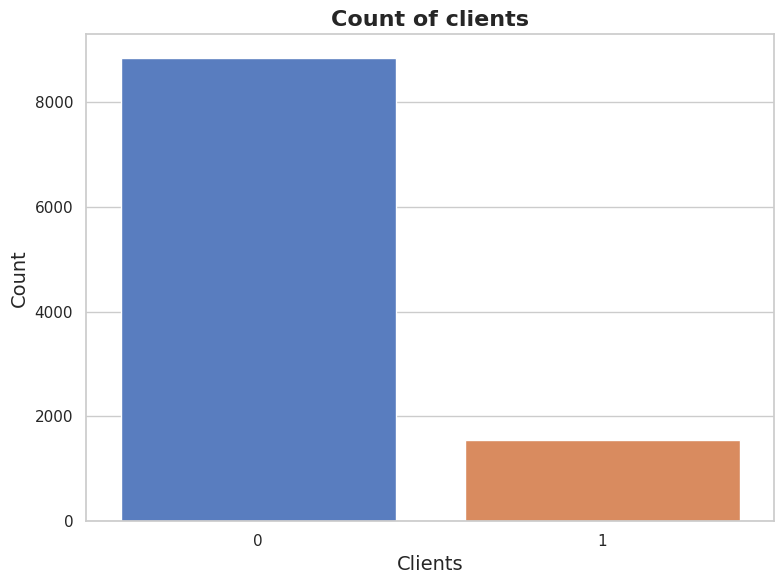

In [22]:
# Plot the countplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set background style for a cleaner look

# Customizing the count plot
ax = sns.countplot(x='default.payment.next.month', data=train_df, hue='default.payment.next.month', palette='muted')

# Add title and labels
ax.set_title('Count of clients', fontsize=16, weight='bold')
ax.set_xlabel('Clients', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Remove legend manually if not needed
ax.get_legend().remove()

# Adjusting layout
plt.tight_layout()
plt.show()


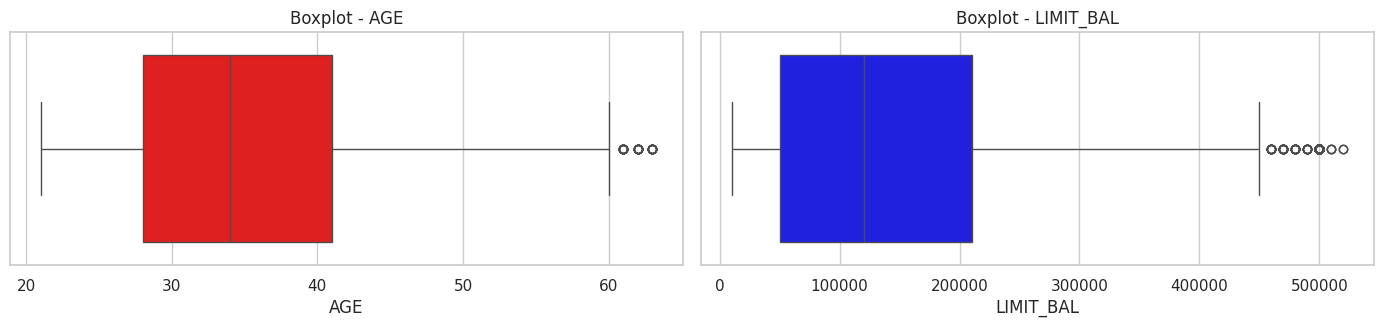

In [23]:

# Set figure size
plt.figure(figsize=(14, 12))

# List of features with corresponding colors
features = [
    ('AGE', 'red'),
    ('LIMIT_BAL', 'blue')
]

# Loop through the features and create boxplots
for i, (feature, color) in enumerate(features):
    plt.subplot(4, 2, i + 1)  # Adjust number of rows and columns as needed
    sns.boxplot(x=train_df[feature], color=color)  # Plot each boxplot
    plt.title(f"Boxplot - {feature}")

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


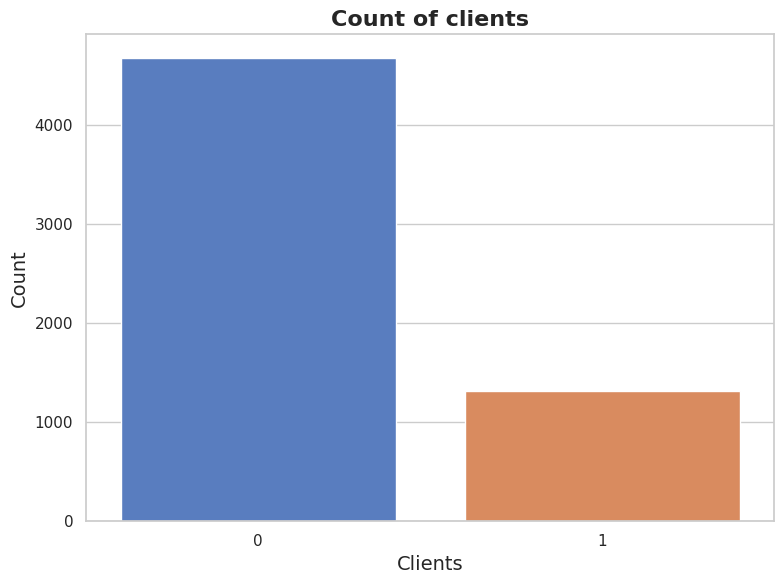

In [24]:
# Plot the countplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set background style for a cleaner look

# Customizing the count plot
ax = sns.countplot(
    x='default.payment.next.month',
    data=test_df,
    hue='default.payment.next.month',
    palette='muted'
)

# Add title and labels
ax.set_title('Count of clients', fontsize=16, weight='bold')
ax.set_xlabel('Clients', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Remove the legend if not needed
ax.get_legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()


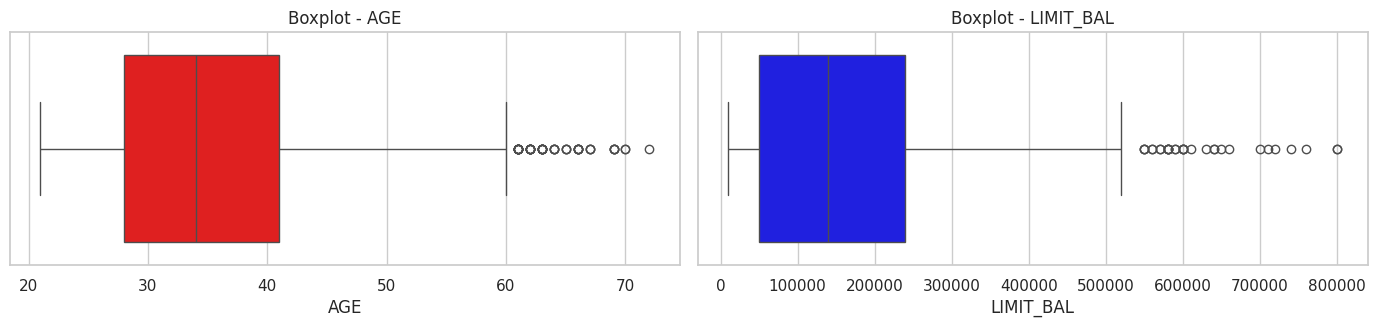

In [25]:

# Set figure size
plt.figure(figsize=(14, 12))

# List of features with corresponding colors
features = [
    ('AGE', 'red'),
    ('LIMIT_BAL', 'blue')
]

# Loop through the features and create boxplots
for i, (feature, color) in enumerate(features):
    plt.subplot(4, 2, i + 1)  # Adjust number of rows and columns as needed
    sns.boxplot(x=test_df[feature], color=color)  # Plot each boxplot
    plt.title(f"Boxplot - {feature}")

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Correlation Heatmap</b></div>

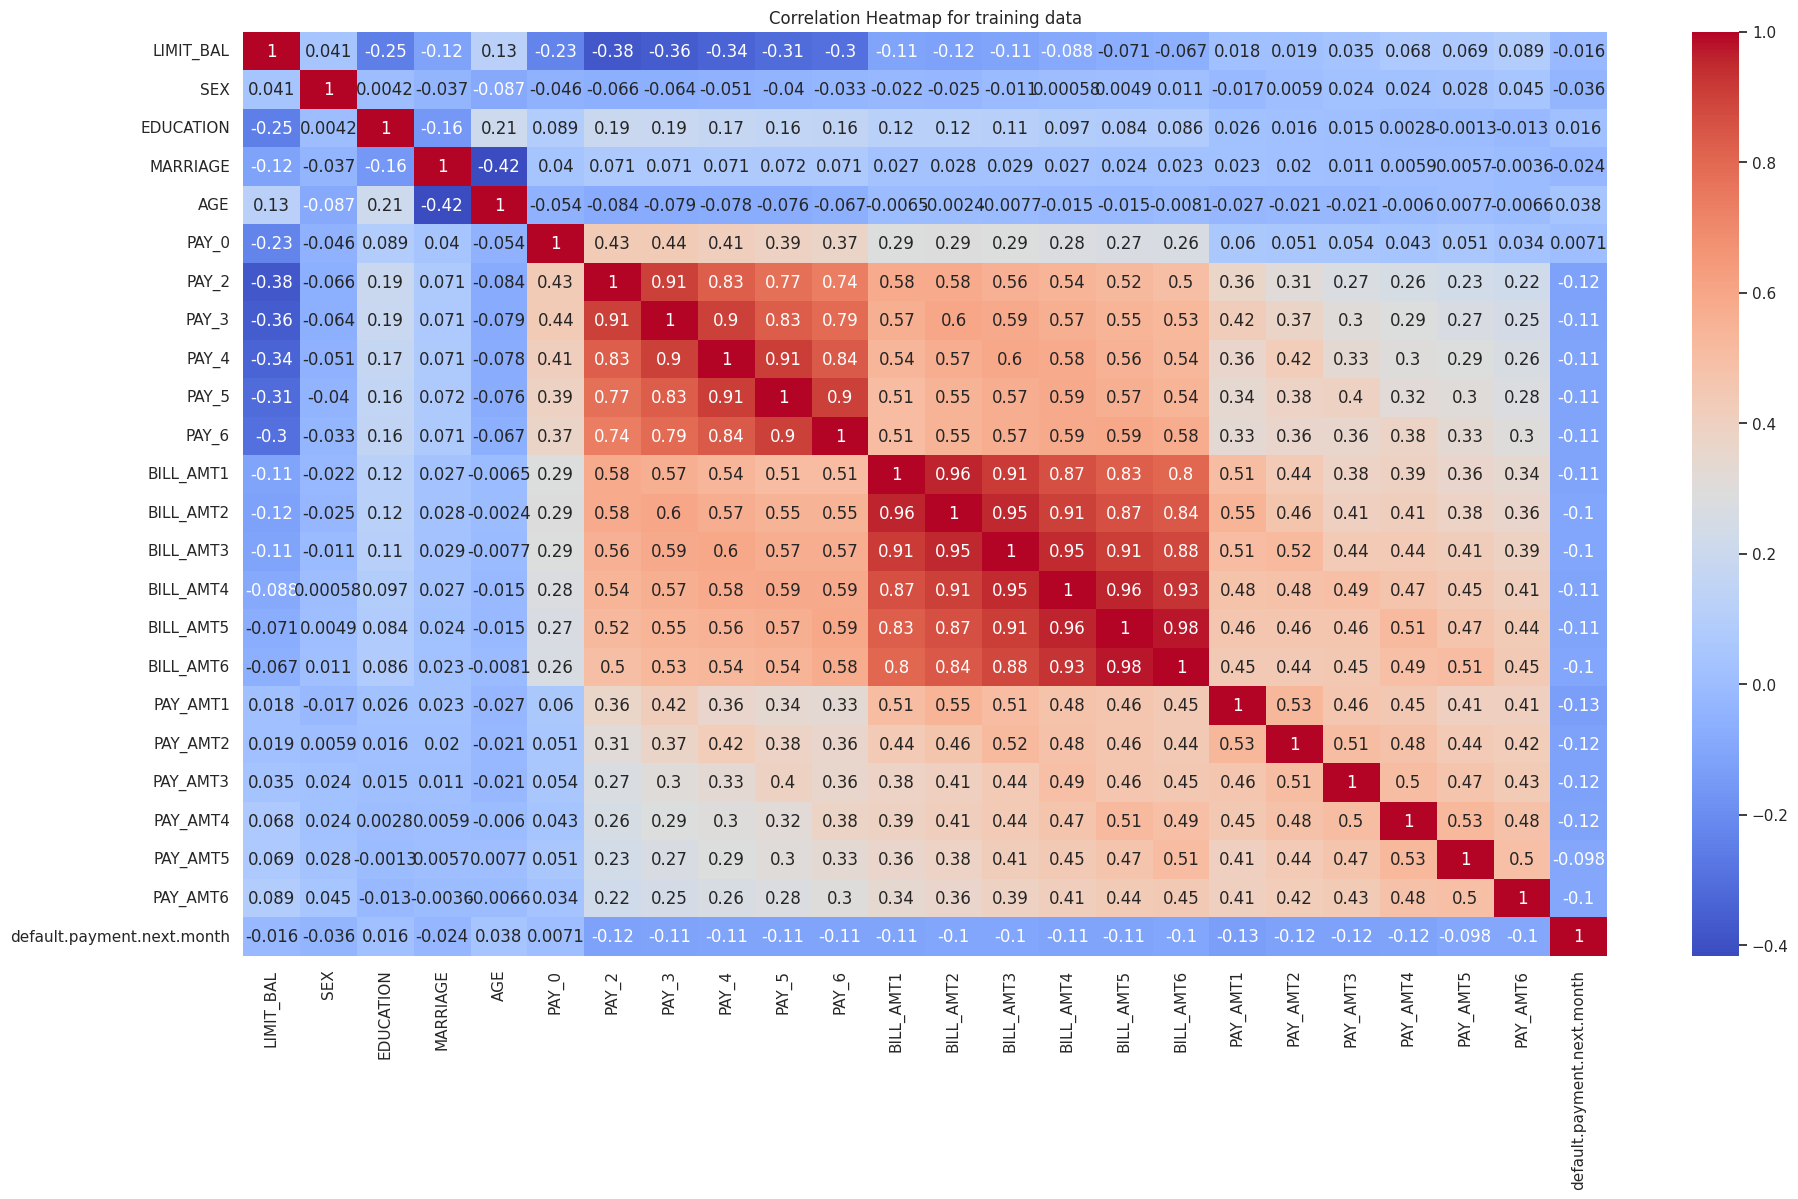

In [26]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(22, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for training data")
plt.show()

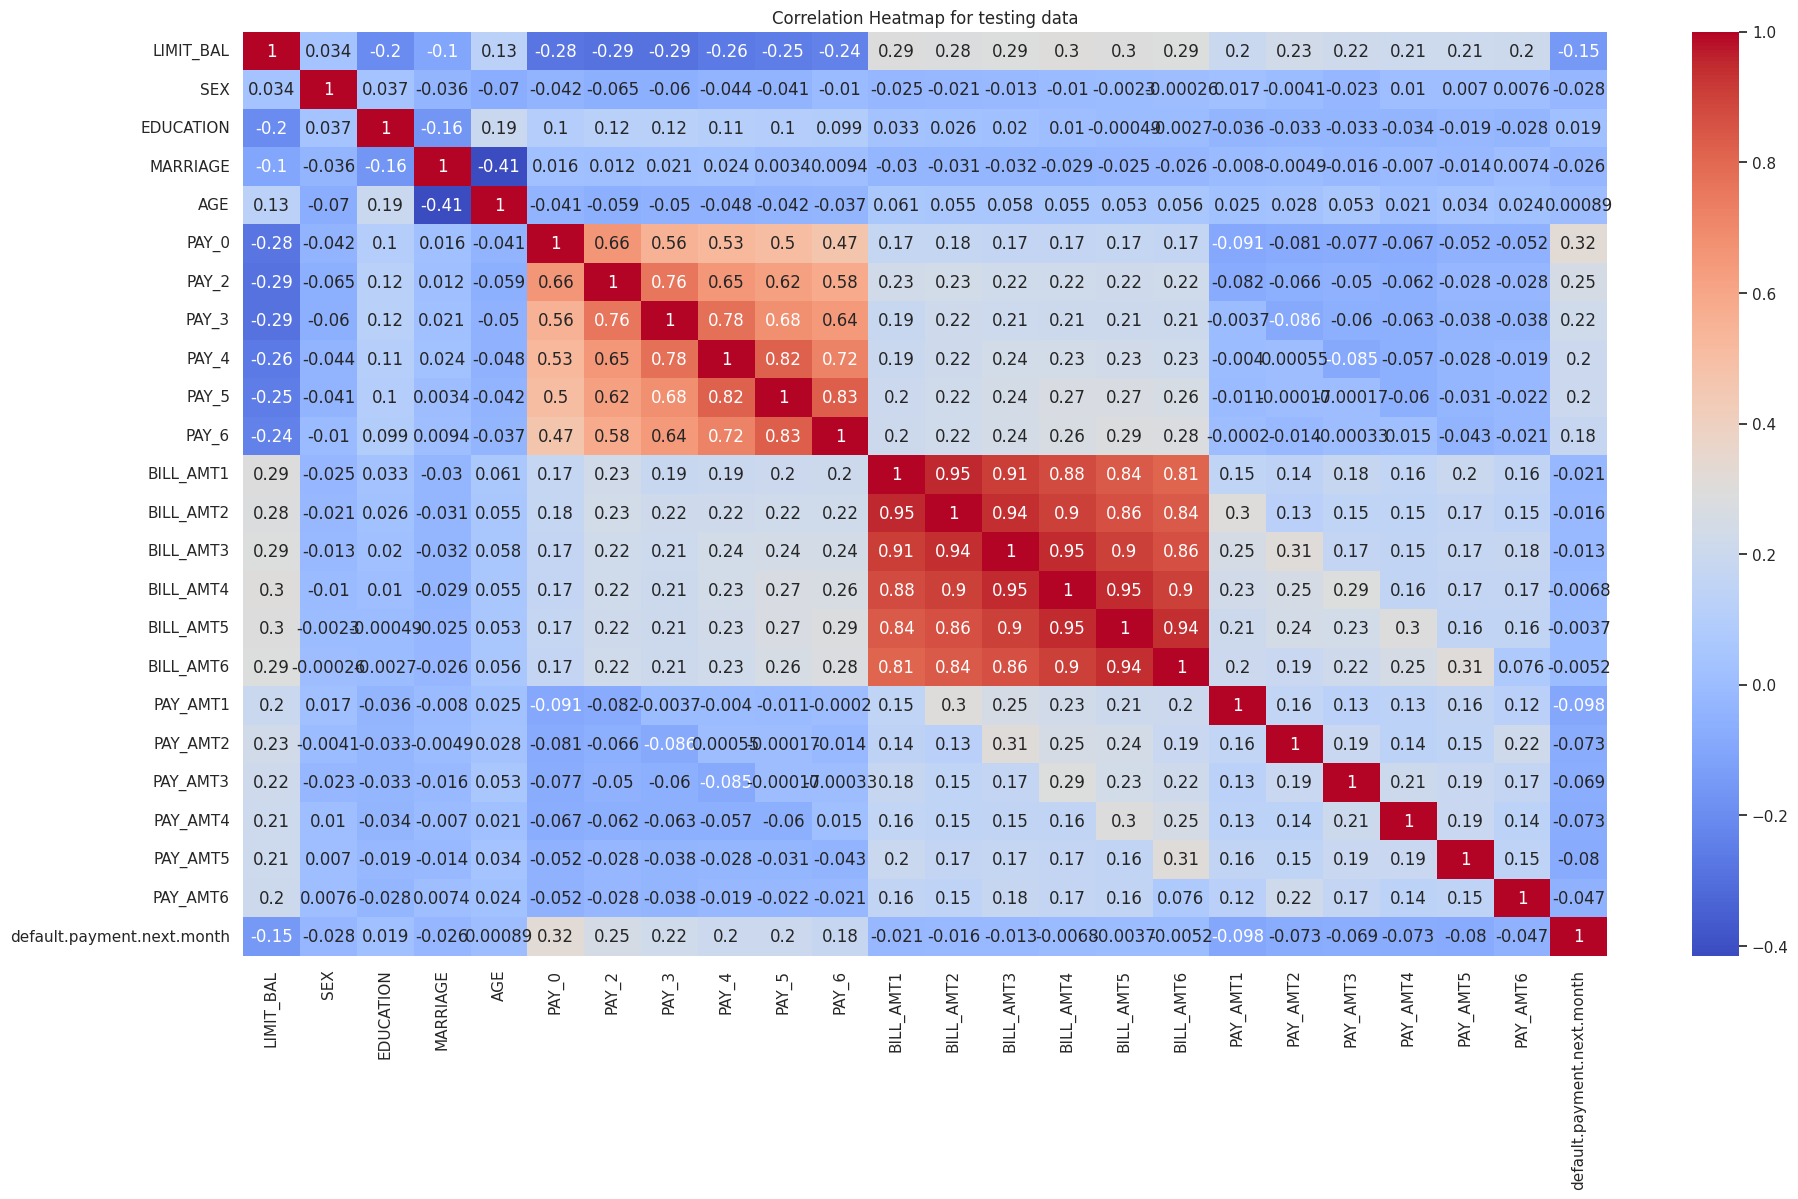

In [27]:
correlation_matrix = test_df.corr()
plt.figure(figsize=(22, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for testing data")
plt.show()

Original number of features: 23
Reduced number of features after PCA: 14


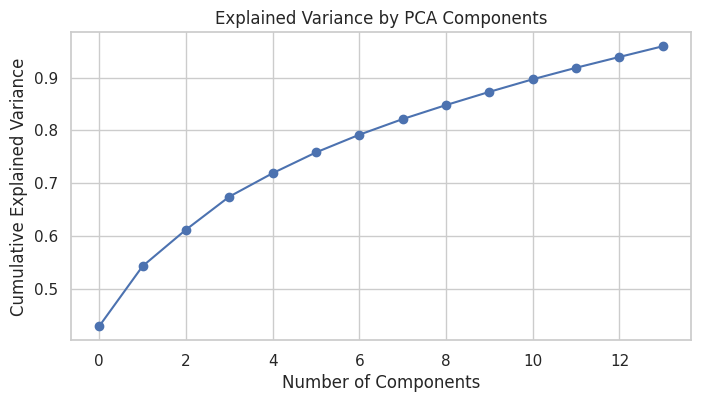

In [28]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming your features are in a variable named X

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Optional: Visualize explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [30]:
# Split data into training and testing sets (adjust 'y' as your label variable)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define SVM and parameter grid
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevant only for 'poly'
}

# Define SVM with class_weight to address imbalance
svm = SVC(class_weight='balanced')

# Grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.7881844380403458
Confusion Matrix:
 [[1569  186]
 [ 255   72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1755
           1       0.28      0.22      0.25       327

    accuracy                           0.79      2082
   macro avg       0.57      0.56      0.56      2082
weighted avg       0.77      0.79      0.78      2082



# **Download Files to make streamlit web app**

In [31]:
import pickle

# save the model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(best_svm, f)

# save PCA
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [32]:
from google.colab import files
files.download("svm_model.pkl")
files.download("pca.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>